In [40]:
import pandas as pd
import matplotlib
BAY_AREA = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", header=0)

In [41]:
ca_df_mar = df[(df['state']=='California')&(df['date'] > '2020-02-28')]
ca_df_mar

,date,county,state,fips,cases,deaths
377,2020-02-29,Humboldt,California,6023.0,1,0
378,2020-02-29,Los Angeles,California,6037.0,1,0
379,2020-02-29,Marin,California,6041.0,1,0
380,2020-02-29,Napa,California,6055.0,1,0
381,2020-02-29,Orange,California,6059.0,1,0
...,...,...,...,...,...,...
14205,2020-03-27,Tulare,California,6107.0,24,0
14206,2020-03-27,Unknown,California,NaN,1,0
14207,2020-03-27,Ventura,California,6111.0,83,3
14208,2020-03-27,Yolo,California,6113.0,16,1


In [42]:
by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='cases', fill_value=0)[BAY_AREA]
by_county_by_date

county,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
date,,,,,,,,,
2020-02-29,0,0,1,1,3,0,4,11,1
2020-03-01,1,0,1,1,3,0,7,12,1
2020-03-02,1,0,1,1,3,1,9,12,2
2020-03-03,2,1,1,1,3,1,11,12,2
2020-03-04,2,1,1,1,3,1,14,12,3
2020-03-05,2,1,1,1,5,1,20,12,3
2020-03-06,3,4,1,1,5,1,24,12,3
2020-03-07,3,4,1,1,11,1,32,12,3
2020-03-08,3,9,1,1,11,1,37,12,3


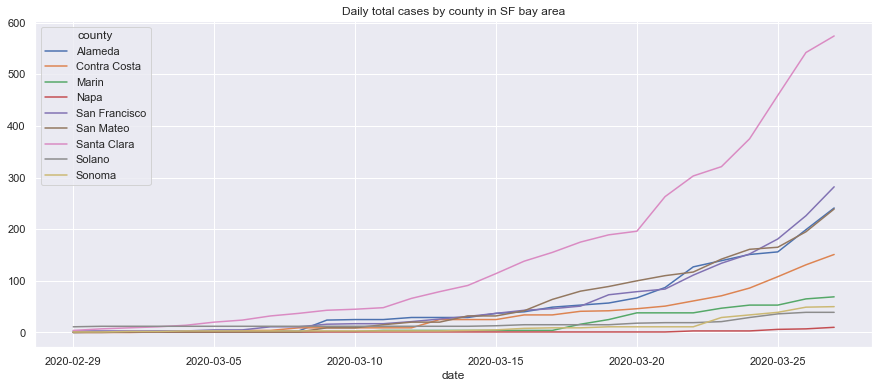

In [43]:
by_county_by_date.plot.line(figsize=(15,6), title='Daily total cases by county in SF bay area')

In [44]:
by_county_by_date_diff = by_county_by_date.diff().iloc[1:]
by_county_by_date_diff

county,Alameda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
date,,,,,,,,,
2020-03-01,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
2020-03-02,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0
2020-03-03,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
2020-03-05,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0
2020-03-06,1.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2020-03-07,0.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,0.0
2020-03-08,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2020-03-09,21.0,0.0,1.0,0.0,5.0,8.0,6.0,0.0,0.0


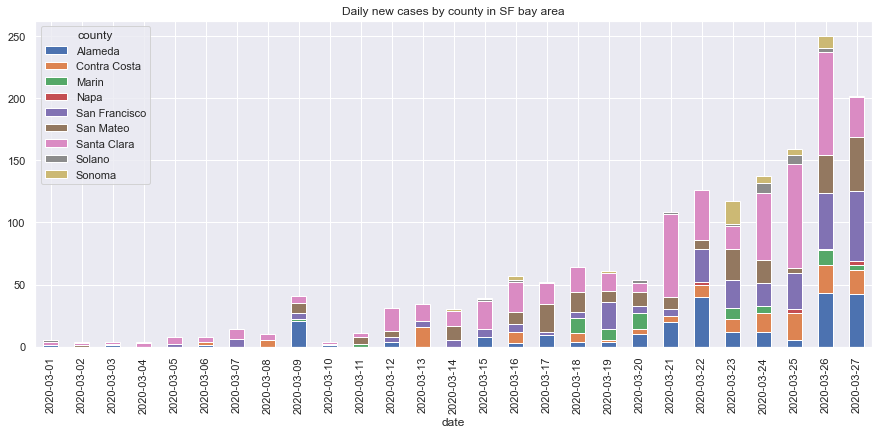

In [45]:
by_county_by_date_diff.plot.bar(stacked=True, figsize=(15,6), title='Daily new cases by county in SF bay area')

In [46]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

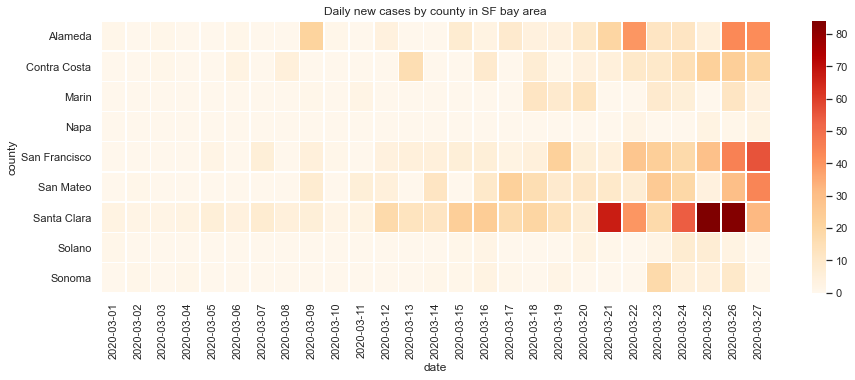

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Daily new cases by county in SF bay area')
sns.heatmap(by_county_by_date_diff.T, cmap="OrRd",linewidths=.5, ax=ax)

In [48]:
ny_df_mar = df[(df['state']=='New York')&(df['date'] > '2020-02-28')]
ny_df_mar

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
519,2020-03-04,Westchester,New York,36119.0,9,0
...,...,...,...,...,...,...
15146,2020-03-27,Warren,New York,36113.0,8,0
15147,2020-03-27,Washington,New York,36115.0,6,0
15148,2020-03-27,Wayne,New York,36117.0,11,0
15149,2020-03-27,Westchester,New York,36119.0,7187,10


In [49]:
ny_by_county_by_date = ny_df_mar.pivot_table(index='date', columns='county',values='cases', fill_value=0)
ny_by_county_by_date

county,Albany,Allegany,Broome,Cayuga,Chautauqua,Chemung,Chenango,Clinton,Columbia,Cortland,...,Suffolk,Sullivan,Tioga,Tompkins,Ulster,Warren,Washington,Wayne,Westchester,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0
2020-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0
2020-03-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33,0
2020-03-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,69,0
2020-03-08,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,81,0
2020-03-09,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,97,0


In [50]:
ny_by_county_by_date_diff = ny_by_county_by_date.diff().iloc[1:]
ny_by_county_by_date_diff

county,Albany,Allegany,Broome,Cayuga,Chautauqua,Chemung,Chenango,Clinton,Columbia,Cortland,...,Suffolk,Sullivan,Tioga,Tompkins,Ulster,Warren,Washington,Wayne,Westchester,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
2020-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
2020-03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0
2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,0.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


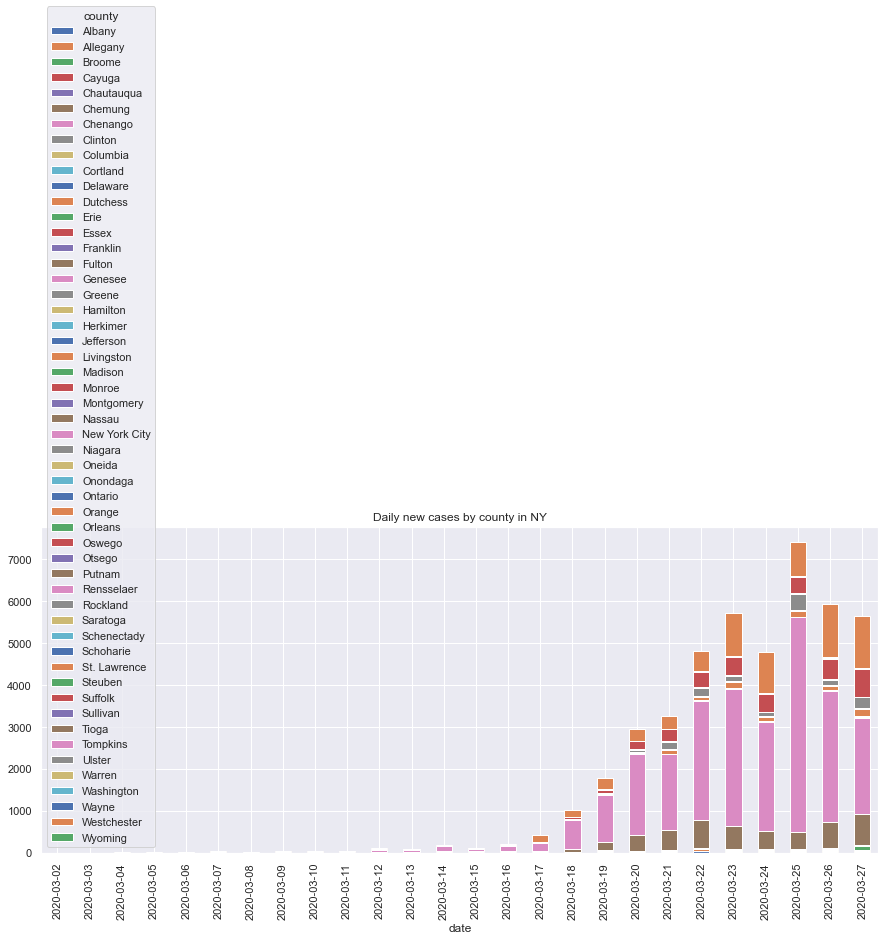

In [51]:
ny_by_county_by_date_diff.plot.bar(stacked=True, figsize=(15,6), title='Daily new cases by county in NY')

In [52]:
state_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", header=0)
state_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
1381,2020-03-27,Virginia,51,606,14
1382,2020-03-27,Washington,53,3770,177
1383,2020-03-27,West Virginia,54,96,0
1384,2020-03-27,Wisconsin,55,930,16


In [53]:
state_df_mar = state_df[state_df['date'] > '2020-02-28']
state_df_mar

,date,state,fips,cases,deaths
230,2020-02-29,Arizona,4,1,0
231,2020-02-29,California,6,28,0
232,2020-02-29,Illinois,17,3,0
233,2020-02-29,Massachusetts,25,1,0
234,2020-02-29,Nebraska,31,13,0
...,...,...,...,...,...
1381,2020-03-27,Virginia,51,606,14
1382,2020-03-27,Washington,53,3770,177
1383,2020-03-27,West Virginia,54,96,0
1384,2020-03-27,Wisconsin,55,930,16


In [54]:
by_state_by_date = state_df_mar.pivot_table(index='date', columns='state',values='cases', fill_value=0)
by_state_by_date

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-02-29,0,0,1,0,28,0,0,0,0,0,...,0,11,1,0,0,0,10,0,1,0
2020-03-01,0,0,1,0,33,0,0,0,0,2,...,0,11,1,0,0,0,17,0,1,0
2020-03-02,0,0,1,0,38,0,0,0,0,2,...,0,11,1,0,0,0,23,0,1,0
2020-03-03,0,0,2,0,45,0,0,0,0,3,...,0,11,1,0,0,0,32,0,1,0
2020-03-04,0,0,2,0,55,0,0,0,0,3,...,0,12,1,0,0,0,47,0,1,0
2020-03-05,0,0,2,0,67,2,0,0,0,4,...,1,16,1,0,0,0,75,0,1,0
2020-03-06,0,0,3,0,81,8,0,0,0,7,...,1,19,3,0,0,0,86,0,1,0
2020-03-07,0,0,5,0,100,8,0,0,1,12,...,1,19,3,1,0,1,110,0,1,0
2020-03-08,0,0,5,0,112,8,1,0,1,13,...,3,23,3,1,0,2,141,0,1,0


In [55]:
by_state_by_date_diff = by_state_by_date.diff().iloc[1:]
by_state_by_date_diff

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2020-03-02,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
2020-03-03,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
2020-03-04,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
2020-03-05,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,1.0,...,1.0,4.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0
2020-03-06,0.0,0.0,1.0,0.0,14.0,6.0,0.0,0.0,0.0,3.0,...,0.0,3.0,2.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0
2020-03-07,0.0,0.0,2.0,0.0,19.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0
2020-03-08,0.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,0.0,1.0,...,2.0,4.0,0.0,0.0,0.0,1.0,31.0,0.0,0.0,0.0
2020-03-09,0.0,0.0,1.0,0.0,60.0,4.0,1.0,0.0,3.0,1.0,...,1.0,1.0,0.0,0.0,0.0,3.0,38.0,0.0,1.0,0.0


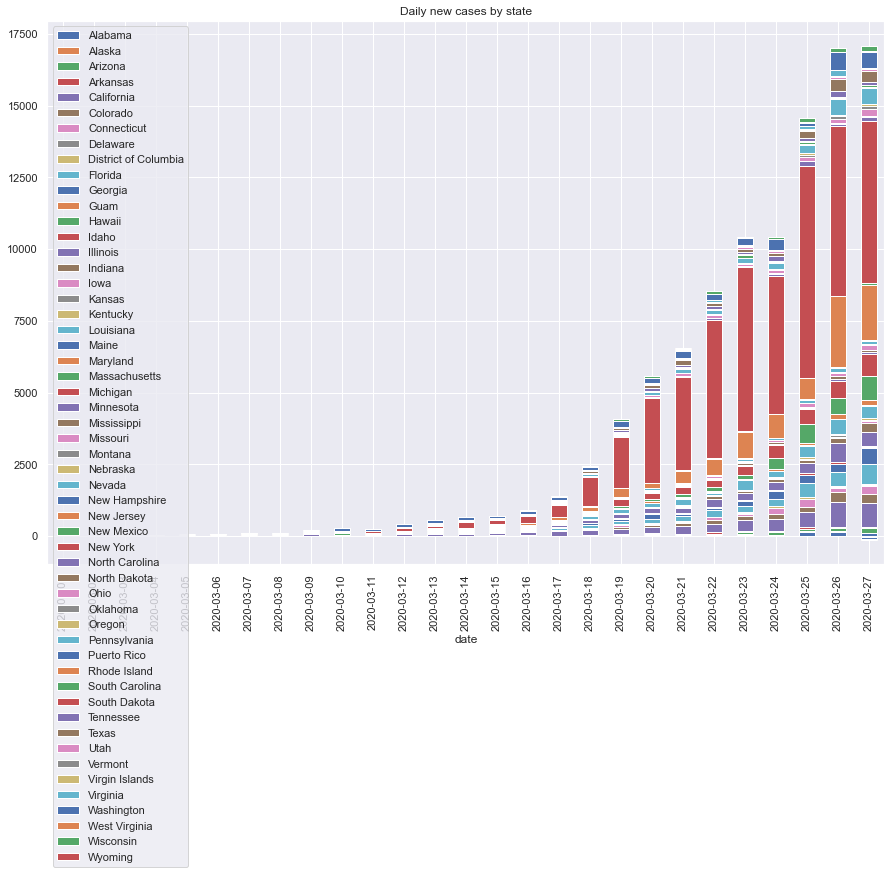

In [56]:
ax3 = by_state_by_date_diff.plot.bar(stacked=True, figsize=(15,10), title='Daily new cases by state')
ax3.legend(loc='upper left')

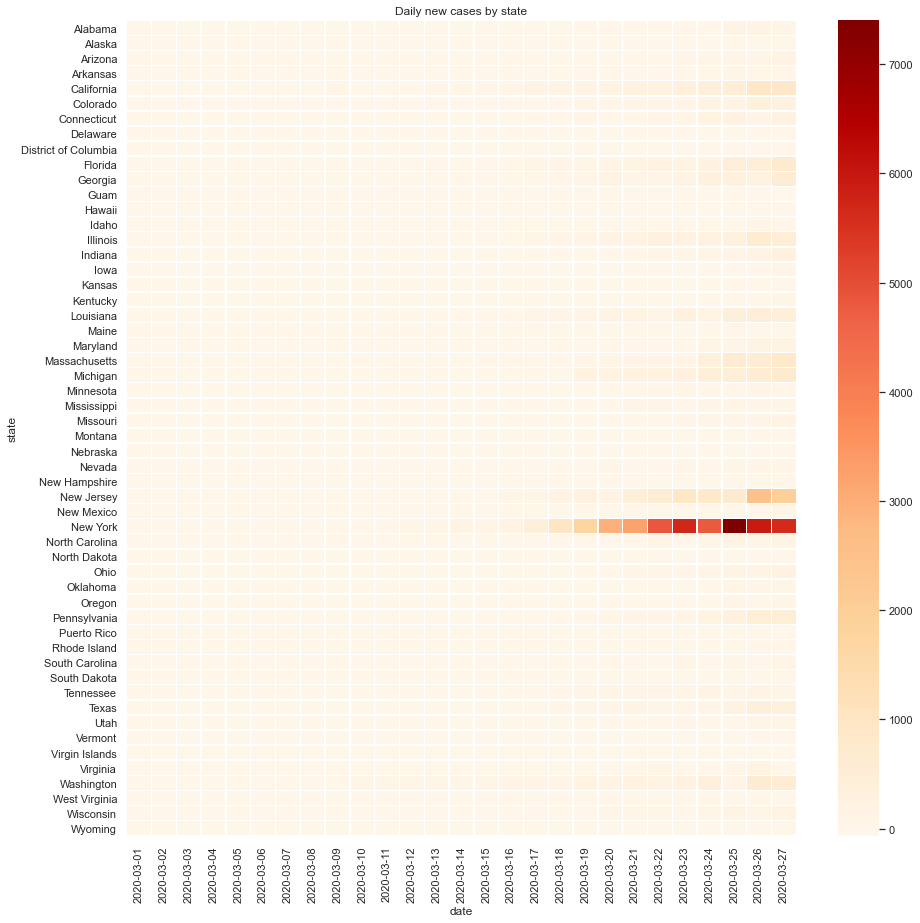

In [57]:
fig2, ax2 = plt.subplots(figsize=(15,15))
ax2.set_title('Daily new cases by state')
sns.heatmap(by_state_by_date_diff.T, cmap="OrRd",linewidths=.5, ax=ax2)